In [2]:
from parse import parse
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def parseLine(line):
    # print(line)
    r = parse("iter = {} energy = ({},{}) structureFactorCDW = ({},{}) MRsign = ({},{})\n", line)
    # print(r)
    if r is None:
        print("error in parse", line)
        return None, None
    sign = complex(eval(r[5]), eval(r[6]))
    cdw = complex(eval(r[3]), eval(r[4]))
    return sign, cdw

In [4]:
def readFile(filename):
    s = []
    c = []
    params = ()
    with open(filename, 'r', encoding='UTF-8') as f: 
        flag = False
        for l in f.readlines():
            if not flag:
                if l[:4] == "iter":
                    flag = True
                    sCur, cCur = parseLine(l)
                    s.append(sCur)
                    c.append(cCur)
                if l[:4] == "Lx =":
                    # print(l)
                    r = parse("Lx = {:d} Ly = {:d} LTau = {:d} dt = {:f} V = {}\n", l)
                    # print(r)
                    params = (r[0], r[1], r[2], r[3], eval(r[4]))     
            else:
                if l[:4] == "iter":
                    sCur, cCur = parseLine(l)
                    if sCur is None:
                        return s, c, params
                    s.append(sCur)
                    c.append(cCur)
                elif l[:7] == "=== End":
                    return s, c, params
                else:
                    print(l, "error invalid line")
    print("warning not finished\n")
    return s, c, params

In [4]:
cdws = {}
mrss = {}
for i in range(84776, 85155):
    s, c, params = readFile("../data/Lx10Ly10_VarvVart/slurm-{}.out".format(i))
    sr = [x.real for x in s]
    l = len(s)
    t = 10.0 / params[2]
    # print("i=", i, "T=", t, "V=", params[4], " ", np.mean(sr), np.std(sr)/np.sqrt(l), np.mean(c))
    cdws[(params[2], round((params[4]-1.0)*20.0))] = np.mean(c).real
    mrss[(params[2], round((params[4]-1.0)*20.0))] = np.mean(sr)

error in parse iter = 927 energy = (-180.962,-3.0764e-14) structureFactorCDW = (0.00443
error in parse iter = 784 energy = (-181.401,2.63309e-14) structureFactorCDW = (0.0
error in parse iter = 856 energy = (-177.593,3.77686e-14) structureFactorCDW = (0.00540692,-7.45207e-18) MRsign = (1,9.6
error in parse iter = 785 energy = (-189.264,-2.37689e-13) struct
error in parse iter = 789 energy = (-175.134,-1.0002e-12) structureFactorCDW = (0.
error in parse iter = 717 energy = (-180.604,1.18342e-12) structureFa
error in parse iter = 787 energy = (-263.591,-
error in parse iter = 571 energy = (-180.27,6.95997e-14) structureFactorCDW = (0.00486923,-
error in parse iter = 428 energy = (-1
error in parse iter = 499 energy = (-183.06,-5.09981e-14) structureFactorCDW = (0.00631113,-1.41673e
error in parse iter = 642 energy = (-184.694,-8.95322e-14) structureFactorCDW = (0.00752667,-1.53862e-18) MRsign = (1,-6.76
error in parse iter = 357 energy = (-197.064,1.35285e-13) structureFactorCDW = (0.008

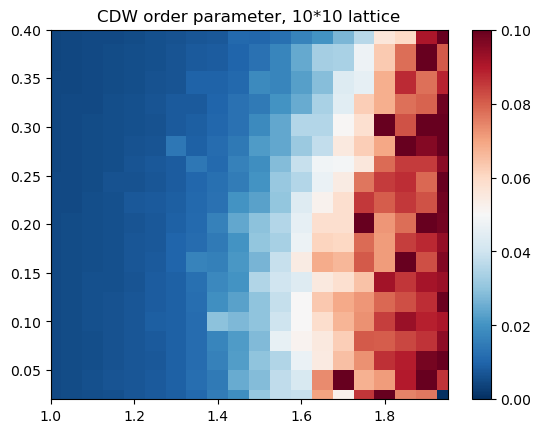

In [5]:
# cdws[(33, 16)] = 0
# generate 2 2d grids for the x & y bounds
ltaus = np.array([25, 27, 29, 31, 33, 36, 38, 41, 45, 50, 55, 62, 71, 83, 100, 125, 167, 250, 500])
y, x = np.meshgrid(10.0/ltaus, np.arange(1.0, 2.0, 0.05))
z = np.zeros((20, len(ltaus)))
for l in range(len(ltaus)):
    for v in range(20):
        if (ltaus[l], v) in cdws:
            z[v, l] = cdws[(ltaus[l], v)]
        else:
            z[v, l] = 0
        

# z = (1 - x / 2. + x ** 5 + y ** 3) * np.exp(-x ** 2 - y ** 2)
# x and y are bounds, so z should be the value *inside* those bounds.
# Therefore, remove the last value from the z array.
# z = z[:-1, :-1]
z_min, z_max = z.min(), z.max()

fig, ax = plt.subplots()

c = ax.pcolormesh(x, y, z, cmap='RdBu_r', vmin=z_min, vmax=0.10)
ax.set_title('CDW order parameter, 10*10 lattice')
# set the limits of the plot to the limits of the data
ax.axis([x.min(), x.max(), y.min(), y.max()])
fig.colorbar(c, ax=ax)

plt.show()

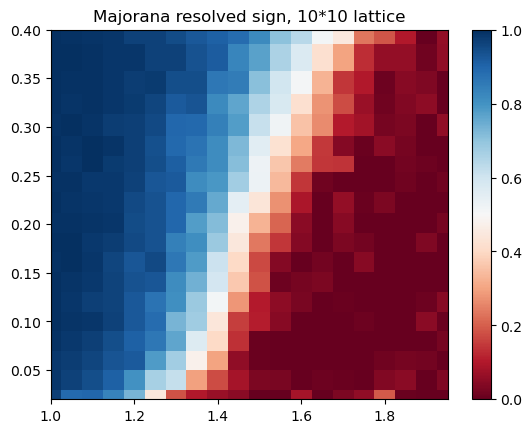

In [6]:
# generate 2 2d grids for the x & y bounds
ltaus = np.array([25, 27, 29, 31, 33, 36, 38, 41, 45, 50, 55, 62, 71, 83, 100, 125, 167, 250, 500])
y, x = np.meshgrid(10.0/ltaus, np.arange(1.0, 2.0, 0.05))
z = np.zeros((20, len(ltaus)))
for l in range(len(ltaus)):
    for v in range(20):
        if (ltaus[l], v) in mrss:
            z[v, l] = mrss[(ltaus[l], v)]
        else:
            z[v, l] = 0
        

# z = (1 - x / 2. + x ** 5 + y ** 3) * np.exp(-x ** 2 - y ** 2)
# x and y are bounds, so z should be the value *inside* those bounds.
# Therefore, remove the last value from the z array.
# z = z[:-1, :-1]
z_min, z_max = z.min(), z.max()

fig, ax = plt.subplots()

c = ax.pcolormesh(x, y, z, cmap='RdBu', vmin=0.0, vmax=1.0)
ax.set_title('Majorana resolved sign, 10*10 lattice')
# set the limits of the plot to the limits of the data
ax.axis([x.min(), x.max(), y.min(), y.max()])
fig.colorbar(c, ax=ax)

plt.show()

In [10]:
signList = {8: [], 10:[], 12:[], 14:[]}
cdwList = {8: [], 10:[], 12:[], 14:[]}
for i in range(85159, 85203):
    s, c, params = readFile("../data/varLVarvCross/slurm-{}.out".format(i))
    sr = [x.real for x in s]
    l = len(s)
    # print("i=", i, "L,Ltau=", (params[0], params[1], params[2]), "V=", params[4], "sign=", np.mean(sr), "signStd=", np.std(sr)/np.sqrt(l))
    signList[params[0]].append(np.mean(sr))
    cdwList[params[0]].append(np.mean(c).real)

warning not finished

warning not finished

warning not finished

warning not finished

warning not finished

warning not finished

warning not finished

warning not finished

warning not finished

warning not finished

warning not finished



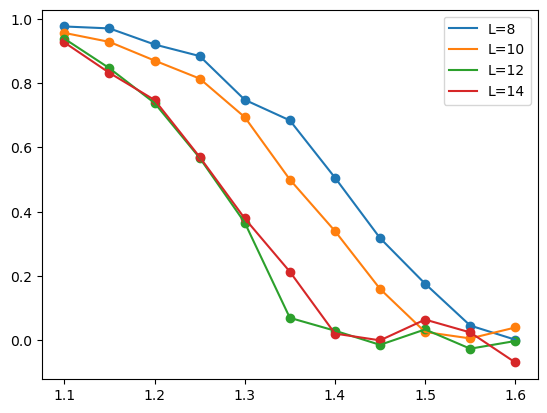

In [9]:
vs = [i for i in np.arange(1.1, 1.61, 0.05)]
for l in signList:
    plt.plot(vs, signList[l], label="L={}".format(l))
    plt.scatter(vs, signList[l])
plt.legend()
plt.show()

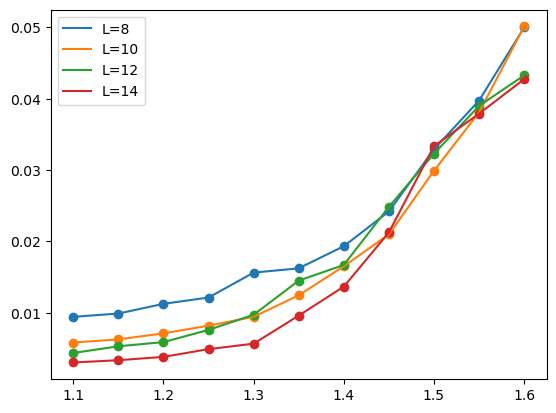

In [11]:
vs = [i for i in np.arange(1.1, 1.61, 0.05)]
for l in signList:
    plt.plot(vs, cdwList[l], label="L={}".format(l))
    plt.scatter(vs, cdwList[l])
plt.legend()
plt.show()

In [14]:
signList = {6: [[], []], 9:[[], []], 12:[[], []], 15:[[], []]}
cdwList = {6: [[], []], 9:[[], []], 12:[[], []], 15:[[], []]}
for i in range(85203, 85251):
    s, c, params = readFile("../data/L3nVarLtauV=1.3/slurm-{}.out".format(i))
    sr = [x.real for x in s]
    l = len(s)
    print("i=", i, "leni=", len(s), "L,Ltau=", (params[0], params[1], params[2]), "V=", params[4], "sign=", np.mean(sr), "signStd=", np.std(sr)/np.sqrt(l))
    if len(s) > 0:
        signList[params[0]][1].append(np.mean(sr))
        signList[params[0]][0].append(params[2])
    # cdwList[params[0]].append(np.mean(c).real)

i= 85203 leni= 1000 L,Ltau= (6, 6, 20) V= 1.3 sign= 0.994 signStd= 0.0034589015597440765
i= 85204 leni= 1000 L,Ltau= (6, 6, 40) V= 1.3 sign= 0.928 signStd= 0.011782020200288233
i= 85205 leni= 1000 L,Ltau= (6, 6, 60) V= 1.3 sign= 0.856 signStd= 0.016348210911289345
i= 85206 leni= 1000 L,Ltau= (6, 6, 80) V= 1.3 sign= 0.674 signStd= 0.02336073628976621
i= 85207 leni= 1000 L,Ltau= (6, 6, 100) V= 1.3 sign= 0.548 signStd= 0.02645176742677132
i= 85208 leni= 1000 L,Ltau= (6, 6, 120) V= 1.3 sign= 0.402 signStd= 0.02895506864091329
i= 85209 leni= 1000 L,Ltau= (6, 6, 140) V= 1.3 sign= 0.276 signStd= 0.03039447318181383
i= 85210 leni= 1000 L,Ltau= (6, 6, 160) V= 1.3 sign= 0.164 signStd= 0.031194614919886413
i= 85211 leni= 1000 L,Ltau= (6, 6, 180) V= 1.3 sign= 0.146 signStd= 0.03128392558487506
i= 85212 leni= 1000 L,Ltau= (6, 6, 200) V= 1.3 sign= 0.066 signStd= 0.031553827026210304
i= 85213 leni= 1000 L,Ltau= (6, 6, 220) V= 1.3 sign= 0.148 signStd= 0.03127452637531063
i= 85214 leni= 1000 L,Ltau= (6

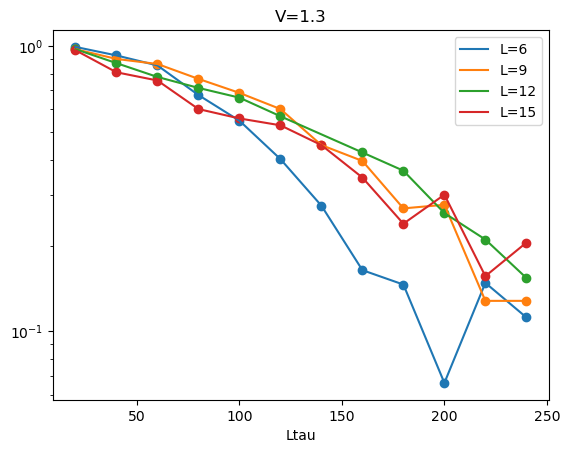

In [20]:
for L in [6, 9, 12, 15]:
    plt.plot(signList[L][0], signList[L][1], label="L={}".format(L))
    plt.scatter(signList[L][0], signList[L][1])
plt.legend()
plt.xlabel("Ltau")
plt.yscale("log")
plt.title("V=1.3")
plt.show()